In [7]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

images training = 10 499 
images validation = 2 000

In [22]:
train_dir = 'C:\\Users\\nico_\\Desktop\\images_kaggle\\Training'
validation_dir = 'C:\\Users\\nico_\\Desktop\\images_kaggle\\Validation'

In [26]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(), 
    
    tf.keras.layers.Dense(512, activation='relu'), 
    
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 64)      

In [30]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [31]:
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [32]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150)) 

Found 21000 images belonging to 2 classes.


In [33]:
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 4000 images belonging to 2 classes.


In [34]:
history = model.fit(train_generator, epochs=15, validation_data = validation_generator, verbose = 2)

Epoch 1/15
1050/1050 - 405s - loss: 0.5760 - accuracy: 0.6875 - val_loss: 0.5256 - val_accuracy: 0.7460 - 405s/epoch - 386ms/step
Epoch 2/15
1050/1050 - 367s - loss: 0.4606 - accuracy: 0.7818 - val_loss: 0.4455 - val_accuracy: 0.7977 - 367s/epoch - 349ms/step
Epoch 3/15
1050/1050 - 365s - loss: 0.3848 - accuracy: 0.8271 - val_loss: 0.4067 - val_accuracy: 0.8255 - 365s/epoch - 348ms/step
Epoch 4/15
1050/1050 - 370s - loss: 0.3103 - accuracy: 0.8684 - val_loss: 0.4496 - val_accuracy: 0.8110 - 370s/epoch - 353ms/step
Epoch 5/15
1050/1050 - 365s - loss: 0.2224 - accuracy: 0.9104 - val_loss: 0.4804 - val_accuracy: 0.8188 - 365s/epoch - 348ms/step
Epoch 6/15
1050/1050 - 368s - loss: 0.1309 - accuracy: 0.9506 - val_loss: 0.5810 - val_accuracy: 0.8278 - 368s/epoch - 350ms/step
Epoch 7/15
1050/1050 - 375s - loss: 0.0634 - accuracy: 0.9765 - val_loss: 0.8006 - val_accuracy: 0.8140 - 375s/epoch - 357ms/step
Epoch 8/15
1050/1050 - 369s - loss: 0.0421 - accuracy: 0.9863 - val_loss: 1.0119 - val_acc

In [35]:
train_class_mapping = train_generator.class_indices

In [36]:
validation_class_mapping = validation_generator.class_indices

In [37]:
print("Mapping des classes pour l'entraînement : ", train_class_mapping)
print("Mapping des classes pour la validation : ", validation_class_mapping)

Mapping des classes pour l'entraînement :  {'cat': 0, 'dog': 1}
Mapping des classes pour la validation :  {'cat': 0, 'dog': 1}


In [42]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [46]:
test_directory = 'C:\\Users\\nico_\\Desktop\\kaggle_chien_chat\\test1\\3.jpg'

img = load_img(test_directory, target_size=(150, 150))
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

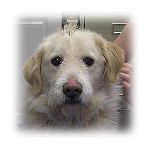

In [49]:
img

In [52]:
x.shape

# 1 seule image téléchargée, 150x150, 3 pour RGB

(1, 150, 150, 3)

In [54]:
classes = model.predict(x)

print(classes[0])
# Interprétez les prédictions (0 pour "chat" et 1 pour "chien")
if classes[0] > 0.5:
    print("L'image est un chien")
else:
    print("L'image est un chat")

1/1 [==============================] - 0s 80ms/step
[1.]
L'image est un chien


Text(0.5, 1.0, 'Training and validation loss')

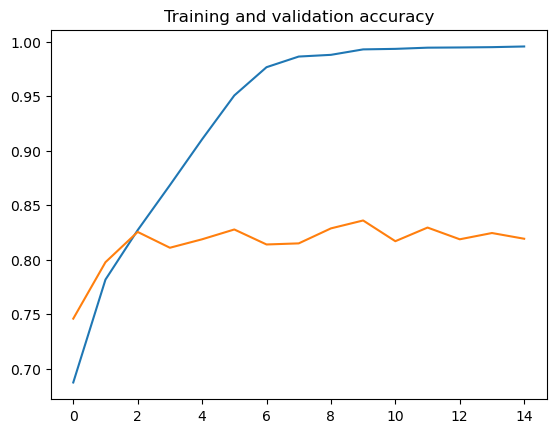

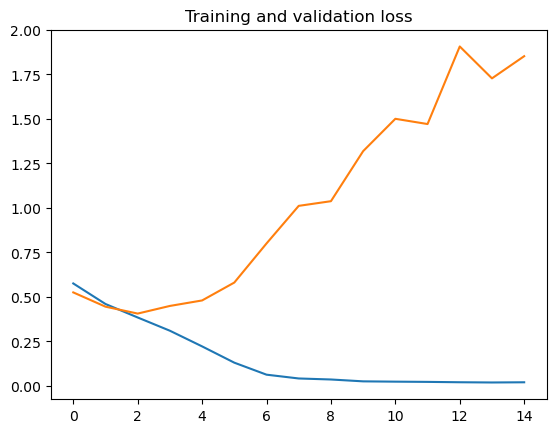

In [61]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) 

# training accuracy : blue
# validation accuracy :orange

plt.plot  ( epochs, acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()


plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss')

# OVERFITTING